<h1><center> Analysis of urban versus rural living</center></h1>
![](https://sustainabilityatspu.files.wordpress.com/2014/01/urban-and-rural.jpg?w=1097&h=784)

In [14]:
%matplotlib inline
import pandas as pd
import copy
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
import seaborn as sns
from scipy import stats

#import corrplot

# styling
pd.set_option('display.max_columns',150)
plt.style.use('bmh')
from IPython.display import display

import warnings
warnings.filterwarnings("ignore")

In [15]:
young = pd.read_csv('../../datasets/from_our_childhood.csv')

In [16]:
# Si bien la función 'describe' nos da todos los datos ya calculados (salvo la moda),
# los vamos a pasar a calcular nuevamente en la siguiente sección
young[['Age', 'Weight']].dropna().describe()

,Age,Weight
count,987.000000,987.000000
mean,20.437690,66.426545
std,2.839328,13.850382
min,15.000000,41.000000
25%,19.000000,55.000000
50%,20.000000,64.000000
75%,22.000000,75.000000
max,30.000000,165.000000


## Estadisticas descriptivas

En la siguiente sección mostraremos algunas estadísticas descriptivas, con sus respectivos gráficos, sobre las variables: Edad, Peso y Género. Se realizará un análisis de outliers como así también se analizará la correlación entre estas variables.

In [17]:
def get_data_statistics(data, var_name):
    mean = np.mean(data)
    median = np.median(data)
    mode= stats.mode(data)
    sd = np.std(data)

    print(
        '''
        Variable {var_name} \n
        \t Media: {0}\n
        \t Mediana: {1}\n
        \t Moda: {2} ({3} repeticiones) \n
        \t Desviación estandard: {4}
        '''.format(
            mean,
            median,
            mode.mode,
            mode.count,
            sd,
            var_name=var_name
        )
    )

    return (mean, sd)

def show_data_distribution(data, var_name, mean, sd, **kwargs):
    _, ax = plt.subplots(figsize=(15, 5))
    plt.xlabel(var_name)
    plt.title(r'$\mathrm{Histograma\ de\ la\ %s:}\ \mu=%.3f,\ \sigma=%.3f$' % (var_name, mean, sd))
    plt.grid(True)

    n, bins, patches = plt.hist(data, edgeColor='black', **kwargs)
    
    # Agregamos una linea que representa el mejor ajuste a los datos
    # utilizando los valores de mu y sigma obtenidos anteriormente
    y = mlab.normpdf(bins, mean, sd)
    l = plt.plot(bins, y, 'r--', linewidth=2)

    plt.show()

In [18]:
# Media, Mediana, Moda y desviación estandard para la variable "Peso", independiente del género.
weight_without_na = young[['Weight']].dropna().Weight

weight_mean, weight_sd = get_data_statistics(weight_without_na, 'Peso')


        Variable Peso 

        	 Media: 66.40505050505051

        	 Mediana: 64.0

        	 Moda: [60.] ([76] repeticiones) 

        	 Desviación estandard: 13.832569338065822
        


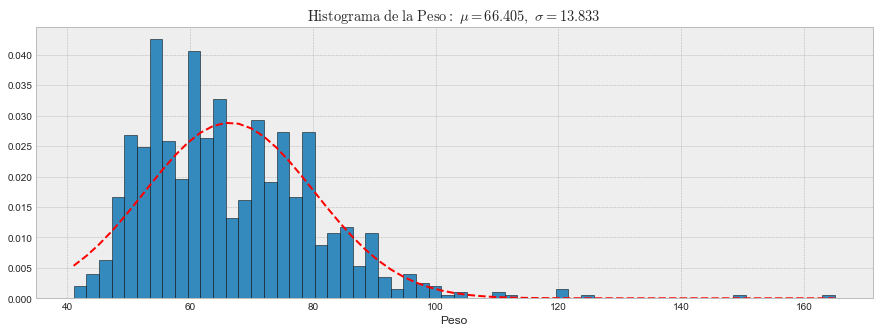

In [19]:
# Histograma del peso con 60 bins y linea de ajuste.
show_data_distribution(young[['Weight']].dropna().Weight, 'Peso', weight_mean, weight_sd, bins=60, normed=True)

In [20]:
# Media, Mediana, Moda y desviación estandard para la variable "Edad", independiente del género.
age_without_na = young[['Age']].dropna().Age

age_mean, age_sd = get_data_statistics(age_without_na, 'Edad')


        Variable Edad 

        	 Media: 20.43369890329013

        	 Mediana: 20.0

        	 Moda: [19.] ([210] repeticiones) 

        	 Desviación estandard: 2.8274295576298125
        


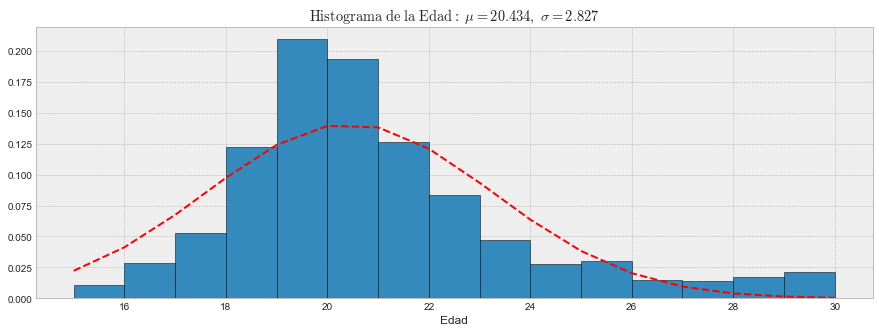

In [21]:
# Histograma de la edad con 15 bins y linea de ajuste.
show_data_distribution(age_without_na, 'Edad', age_mean, age_sd, bins=15, normed=True)

#### Análisis de la distribución del peso y la edad

Ambos histogramas nos muestran que tanto el peso como la edad responden a una distribución normal.

En el caso del peso $\mu: 66.405$ y $\sigma: 13.833$

En el caso de la edad $\mu: 20.434$ y $\sigma: 2.827$

### Outliers

Una forma de ver y analizar los _outliers_ es a través de un gráfico **boxplot**. 

Seaborn nos facilita esto a través de la función **boxplot** que proporciona además una forma de visualizar los datos outliers.

In [22]:
# Función genérica que grafica un boxplot del dataset proporcionado
# Los 'outliers' se obtienen usando un método que es una función del rango interquartil.
def get_data_boxplot(dataset, **kwargs):
    _, ax = plt.subplots(figsize=(20, 5))
    sns.set_style("whitegrid")
    sns.boxplot(x=dataset, **kwargs)
    
    sns.despine()

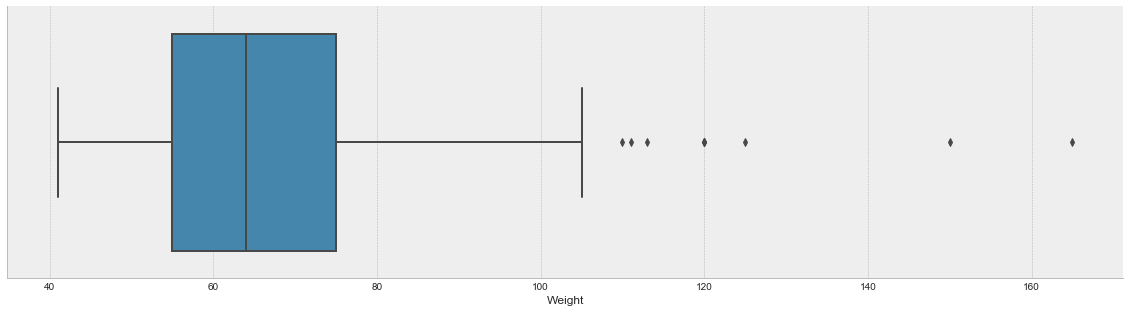

In [23]:
get_data_boxplot(weight_without_na)

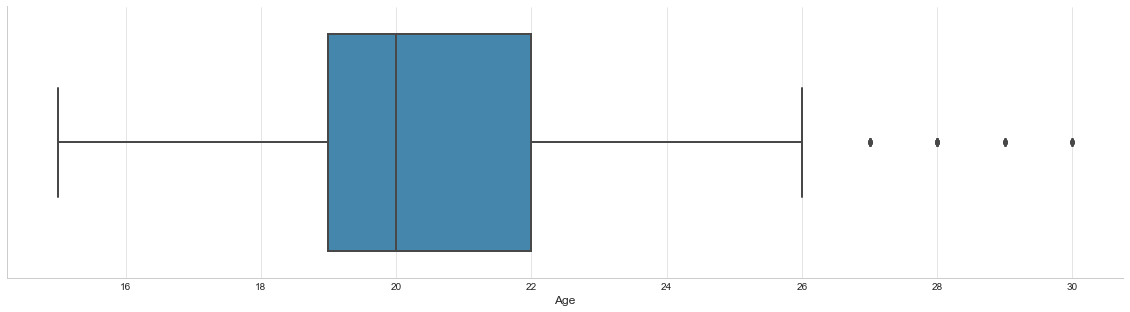

In [24]:
get_data_boxplot(age_without_na) 

#### Análisis sobre los outliers

DS = _Desviación estandard_

Para la variable **Peso**, los outliers representan a las personas con sobrepeso (por encima de las 108 lbs.) y del total de la muestra, de 990 entradas, estas representan ~1% del total (9 registros). En base a los datos calculados para la variable en cuestión, estos datos están 3 DS por encima de la media. No existen outliers por 3 DS por debajo de la media ya que el registro mínimo registrado es de 41 lbs.

Para la variable **Edad**, sucede algo similar. Los outliers representan a las personas estrictamente mayores a los 26 años. Dado que la media para esta variable es de **20,434** y la desviación estandard es de **2.83**. Los valores que caigan por fuera de **26** (2 veces la DS sobre la media) son considerados outliers. Dado que el dato mínimo registrado es de una persona de **15** años, al estar dentro del rango de 2 DS, no se considera outlier.

En general los valores _outliers_  son indicativos de que los datos pueden pertenecer a una población diferente del resto de las muestras. Las estadísticas descriptivas derivadas de esto pueden ser engañosas si consideramos a la media. En ese caso la mediana puede resultar de más utilidad.

### Análisis de género

En la siguiente sección se analizarán las mismas métricas pero teniendo en cuenta el género. Además, se analizará la correlación entre las variables **Peso** y **Edad**.

In [25]:
age_and_gender_without_na = young[['Age', 'Gender']].dropna()
age_male = age_and_gender_without_na[age_and_gender_without_na.Gender == 'male'].Age
age_female = age_and_gender_without_na[age_and_gender_without_na.Gender == 'female'].Age

# Media, Mediana, Moda y desviación estandard para la variable "Edad", de género "Masculino"
_, _ = get_data_statistics(age_male, 'Edad, género Masculino')

# Media, Mediana, Moda y desviación estandard para la variable "Edad", de género "Femenino"
_, _ = get_data_statistics(age_female, 'Edad, género Femenino')


        Variable Edad, género Masculino 

        	 Media: 20.87286063569682

        	 Mediana: 20.0

        	 Moda: [19.] ([80] repeticiones) 

        	 Desviación estandard: 2.7933683048767595
        

        Variable Edad, género Femenino 

        	 Media: 20.113752122241088

        	 Mediana: 20.0

        	 Moda: [19.] ([129] repeticiones) 

        	 Desviación estandard: 2.790165425784379
        


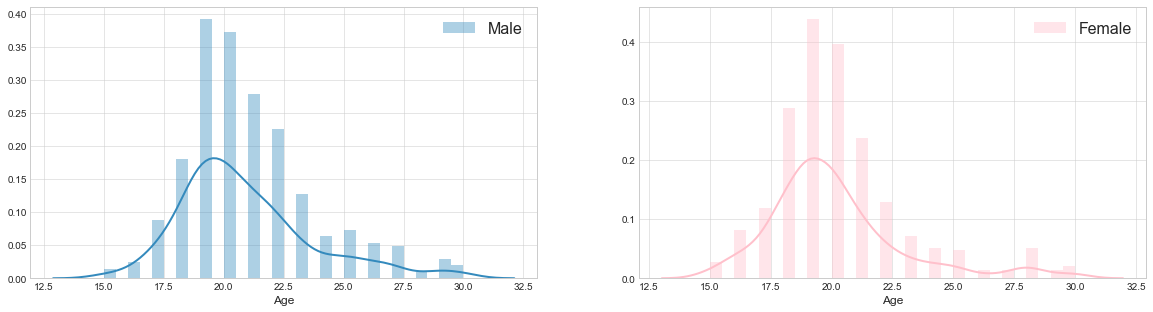

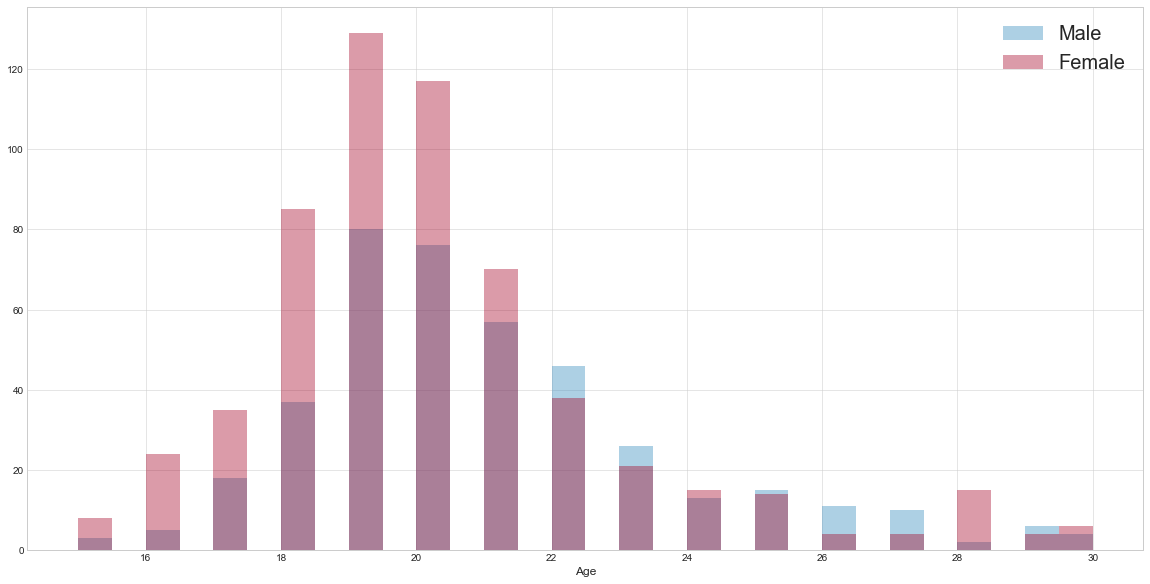

In [26]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,5))

male_age_hist = sns.distplot(age_male, label = 'Male', ax = ax[0], kde = True, bins = 30)
female_age_hist = sns.distplot(age_female, label = 'Female', ax = ax[1], kde = True, bins = 30, color = 'pink')
ax[0].legend(loc=1, prop={'size': 16})
ax[1].legend(loc=1, prop={'size': 16})

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,10))

_ = sns.distplot(age_male, label = 'Male', kde = False, bins = 30)
_ = sns.distplot(age_female, label = 'Female', kde = False, bins = 30)
ax.legend(loc=1, prop={'size': 20})